## Reading data and EDA

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
db = pd.read_csv("diabetes.csv")
db.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
db.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [4]:
df1 = pd.DataFrame(db)

df = pd.DataFrame(db)
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
df.isnull().values.any()

False

In [6]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [7]:
df.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [8]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [9]:
df.info()         

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [10]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [11]:
df.index

RangeIndex(start=0, stop=768, step=1)

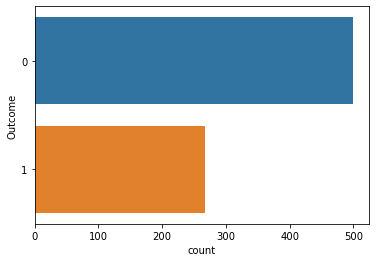

In [66]:
sns.countplot(y='Outcome',data=df) #,palette='hls')

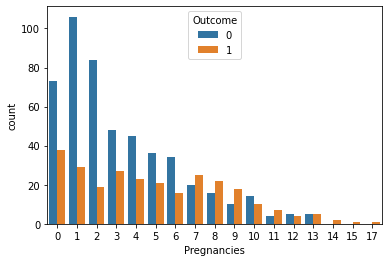

In [67]:
sns.countplot(df['Pregnancies'], hue=df['Outcome'])

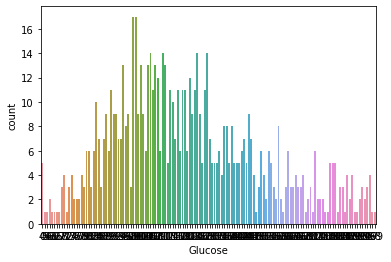

In [69]:
sns.countplot(x='Glucose',data=df)

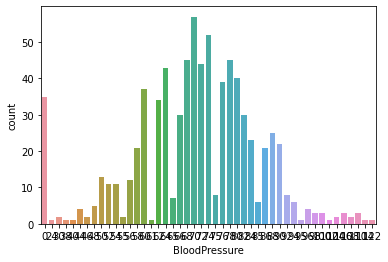

In [14]:
sns.countplot(x='BloodPressure',data=df)

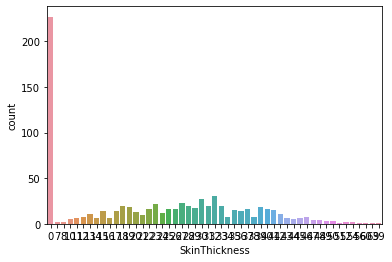

In [15]:
sns.countplot(x='SkinThickness',data=df)

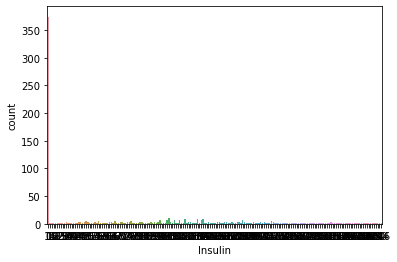

In [16]:
sns.countplot(x='Insulin',data=df)

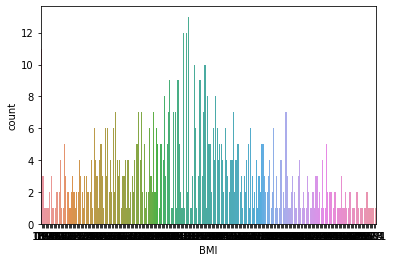

In [17]:
# 'BMI', 'DiabetesPedigreeFunction', 'Age',
sns.countplot(x='BMI',data=df)

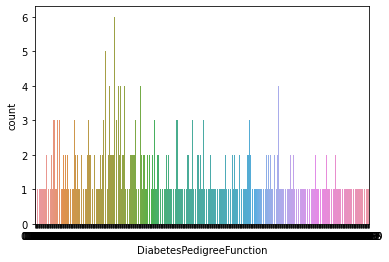

In [18]:
sns.countplot(x='DiabetesPedigreeFunction',data=df)

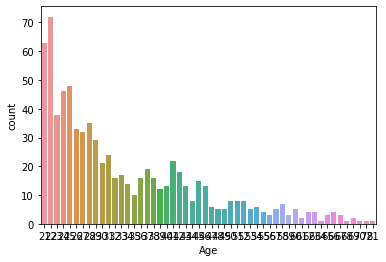

In [19]:
sns.countplot(x='Age',data=df)

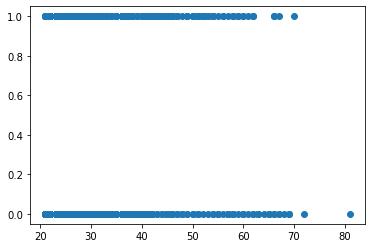

In [20]:
import matplotlib.pyplot as plt
plt.scatter(df['Age'], df['Outcome'])

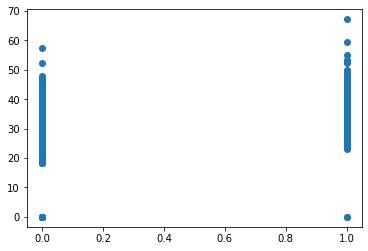

In [21]:
plt.scatter( df['Outcome'],df['BMI'])

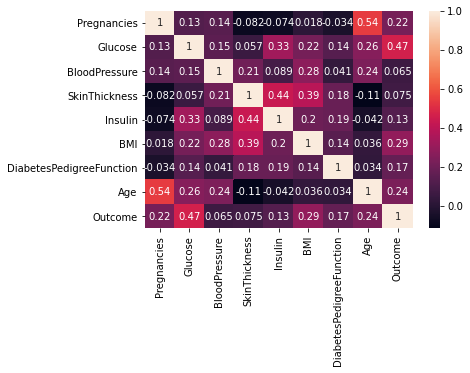

In [70]:
sns.heatmap(df.corr(), annot = True)

## All features seem fairly useful for prediction 

# Models

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score,recall_score
from sklearn.ensemble import RandomForestClassifier

In [48]:
X = df[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness','Insulin',
       'BMI', 'DiabetesPedigreeFunction','Age']]
#['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']
Y = df[['Outcome']]

In [49]:
x_train,x_test,y_train,y_test = train_test_split(X,Y, test_size=0.25)

In [50]:
print(x_train.shape,x_test.shape)
print(y_train.shape,y_test.shape)

(576, 8) (192, 8)
(576, 1) (192, 1)


In [72]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve

In [52]:
model = DecisionTreeClassifier()

In [53]:
model.fit(x_train,y_train)

DecisionTreeClassifier()

In [54]:
importance = model.feature_importances_
importance

array([0.07460538, 0.30522555, 0.0923098 , 0.05667643, 0.05847064,
       0.15352341, 0.11158715, 0.14760163])

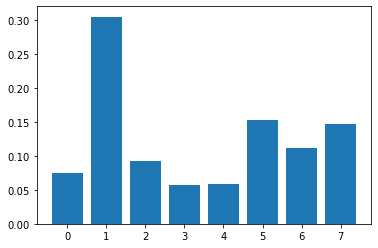

In [55]:
from matplotlib import pyplot
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

In [56]:
dt_pred = model.predict(x_test)
dt_pred

array([0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1], dtype=int64)

In [57]:
model.score(x_test,y_test)

0.703125

In [58]:
precision_score(y_test,dt_pred)

0.6515151515151515

In [59]:
recall_score(y_test,dt_pred)

0.5584415584415584

In [74]:
mat = confusion_matrix(y_test,dt_pred)
mat

array([[92, 23],
       [34, 43]], dtype=int64)

In [75]:
print(classification_report(y_test, dt_pred))

              precision    recall  f1-score   support

           0       0.73      0.80      0.76       115
           1       0.65      0.56      0.60        77

    accuracy                           0.70       192
   macro avg       0.69      0.68      0.68       192
weighted avg       0.70      0.70      0.70       192



# 2


In [60]:
rf = RandomForestClassifier()

In [61]:
rf.fit(x_train,y_train)

<ipython-input-61-895403b03771>:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(x_train,y_train)


RandomForestClassifier()

In [43]:
print(x_train.shape,x_test.shape)
print(y_train.shape,y_test.shape)

(576, 8) (192, 8)
(576, 1) (192, 1)


In [62]:
importance = rf.feature_importances_
importance

array([0.09011927, 0.26085651, 0.08217219, 0.07143347, 0.07976295,
       0.15310821, 0.1240969 , 0.1384505 ])

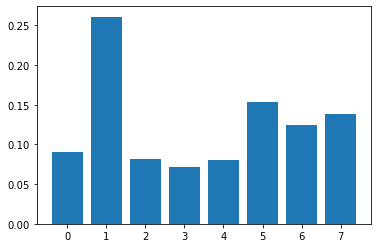

In [63]:
from matplotlib import pyplot
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

In [64]:
rf_pred = rf.predict(x_test)
rf_pred

array([0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1], dtype=int64)

In [65]:
rf.score(x_test,y_test)

0.7291666666666666

In [85]:
confusion_matrix(y_test,rf_pred)

array([[101,  14],
       [ 38,  39]], dtype=int64)

In [79]:
df1=pd.DataFrame()
df1

""


In [81]:
df1['rf']=rf_pred
df1

,rf
0,0
1,0
2,1
3,1
4,1
...,...
187,0
188,1
189,0
190,1


In [83]:
df1['dt']=dt_pred
df1

,rf,dt
0,0,0
1,0,1
2,1,1
3,1,1
4,1,1
...,...,...
187,0,0
188,1,1
189,0,1
190,1,1


In [86]:
df1.to_csv('predic.csv',index=False)

In [88]:
df2=pd.read_csv('predic.csv')
df2

,rf,dt
0,0,0
1,0,1
2,1,1
3,1,1
4,1,1
...,...,...
187,0,0
188,1,1
189,0,1
190,1,1


In [ ]:
# iris = load_iris()
# x=iris.data
# y=iris.target

# kmeans = KMeans(n_clusters=3)
# kmeans.fit(x)
# kmeans.predict(x)



# from sklearn.cluster import KMeans
# wcss = []

# for i in range(1, 11):
#     kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
#     kmeans.fit(x)
#     wcss.append(kmeans.inertia_)
    
# #Plotting the results onto a line graph, allowing us to observe 'The elbow'
# plt.plot(range(1, 11), wcss)
# plt.title('The elbow method')
# plt.xlabel('Number of clusters')
# plt.ylabel('WCSS') #within cluster sum of squares
# plt.show()